In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [ ]:
data=pd.read_csv('/content/hou_all.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Unnamed: 14
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [ ]:
#data preprocessing
data.zn.replace(0,np.nan,inplace = True)
data.chas.replace(0,np.nan,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   crim         506 non-null    float64
 1   zn           134 non-null    float64
 2   indus        506 non-null    float64
 3   chas         35 non-null     float64
 4   nox          506 non-null    float64
 5   rm           506 non-null    float64
 6   age          506 non-null    float64
 7   dis          506 non-null    float64
 8   rad          506 non-null    int64  
 9   tax          506 non-null    int64  
 10  ptratio      506 non-null    float64
 11  black        506 non-null    float64
 12  lstat        506 non-null    float64
 13  medv         506 non-null    float64
 14  Unnamed: 14  506 non-null    int64  
dtypes: float64(12), int64(3)
memory usage: 59.4 KB


In [ ]:
#count the percent of the number of missing values for each feature using isnull().sum()
percentage= data.isnull().sum()/len(data) * 100
percentage

crim            0.000000
zn             73.517787
indus           0.000000
chas           93.083004
nox             0.000000
rm              0.000000
age             0.000000
dis             0.000000
rad             0.000000
tax             0.000000
ptratio         0.000000
black           0.000000
lstat           0.000000
medv            0.000000
Unnamed: 14     0.000000
dtype: float64

In [ ]:
#Both “ZN” and “CHAS” are missing more than 70% data, so will remove both these features.
data = data.drop(["zn","chas"],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   crim         506 non-null    float64
 1   indus        506 non-null    float64
 2   nox          506 non-null    float64
 3   rm           506 non-null    float64
 4   age          506 non-null    float64
 5   dis          506 non-null    float64
 6   rad          506 non-null    int64  
 7   tax          506 non-null    int64  
 8   ptratio      506 non-null    float64
 9   black        506 non-null    float64
 10  lstat        506 non-null    float64
 11  medv         506 non-null    float64
 12  Unnamed: 14  506 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


# **EDA**
### Exploratory Data Analysis is a very important step before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


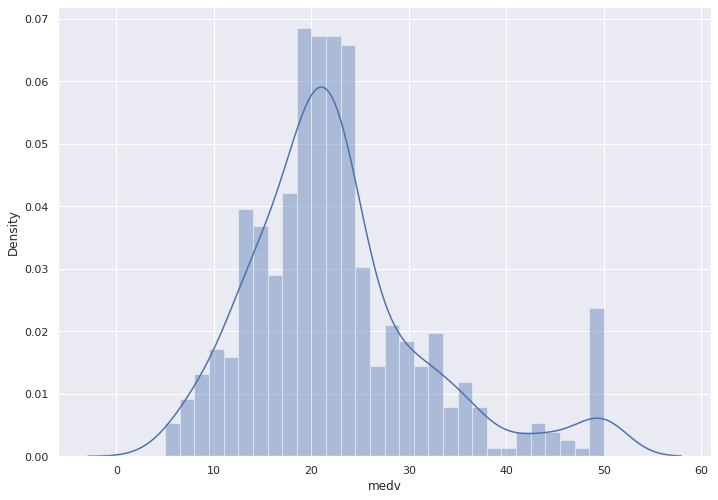

In [ ]:
#first plot the distribution of the target variable MEDV. We will use the distplot function from the seaborn library.
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['medv'],bins=30)
plt.show()

### create a **correlation matrix **that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmapfunction from the seaborn library to plot the correlation matrix.


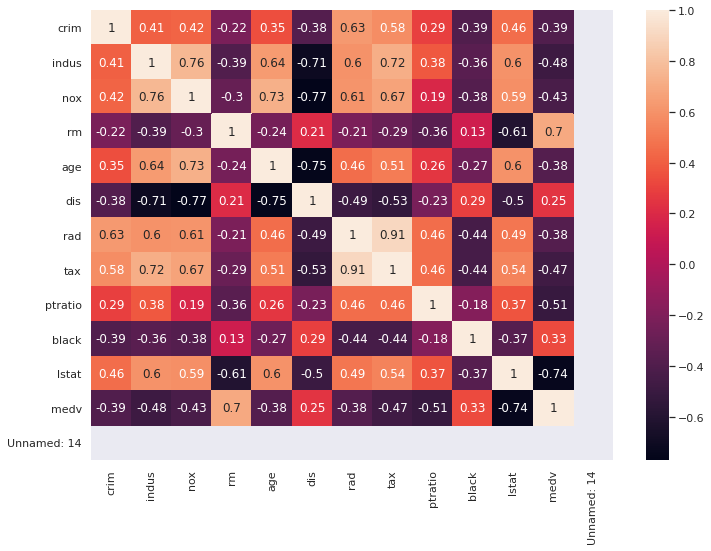

In [ ]:
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

 To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation withMEDV(0.7) whereas LSTAT has a high negative correlation with MEDV(-0.74).

In [ ]:
#spliting data
from sklearn.model_selection import train_test_split
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Model evaluation
We will evaluate our model using RMSE and R2-score.


In [ ]:
y_pred = model.predict(X_test)
from sklearn import metrics 
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", model.score(X_test, y_test)) 

MAE 0.0
MSE 0.0
RMSE 0.0
Score: 1.0


In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

1.0